<a href="https://colab.research.google.com/github/akinbeduk/DataScience/blob/main/Statistics_Assignment_5_(Hypothesis_Tests)_D1622_Ak%C4%B1n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scipy==1.6.0

In [96]:
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
print(scipy.__version__)

1.6.0


EXERCISE 1. The hourly wages in a particular industry are normally distributed with mean 13.20 dolar and standard deviation 2.50 dolar. A company in this industry employs 40 workers, paying them an average of 12.20 dolar per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test. (Wackerly, Ex.10.18)

In [19]:
# H0: mu = 12.20
# H1: mu < 12.20
n=40
s=2.5
xbar=13.20
alpha=.01
#We know standart deviation so we can use z test

In [10]:
z=(12.20-xbar)/(s/np.sqrt(40))
z

-2.5298221281347035

In [17]:
p_value=stats.norm.cdf(z)
p_value

0.005706018193000826

In [20]:
# Compare p-value and alpha

if p_value < alpha:
    print("Reject the null")
else:
    print("Fail to reject the null")

Reject the null


EXERCISE 2. Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?

In [69]:
soil=pd.read_csv("soil.csv")
soil

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371
5,1.641,1.428
6,1.499,1.119
7,1.347,1.373
8,1.685,1.589
9,1.578,1.714


In [63]:
alpha=0.1
# H0: mu = %1
# H1: mu != %1

In [67]:
indTest = stats.ttest_ind(soil.Soil1, soil.Soil2, nan_policy="omit", alternative="two-sided")
indTest

Ttest_indResult(statistic=5.1681473319343345, pvalue=2.5932287323528147e-06)

EXERCISE 3. The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats.  2015 PISA Test Dataset

Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).
Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.

In [70]:
pisa=pd.read_csv("pisa.csv")
pisa

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375
...,...,...,...,...,...,...
65,TUN,AF,48.519836,366.8180,361.0555,386.4034
66,TUR,EU,53.744979,420.4540,428.3351,425.4895
67,URY,SA,64.600000,417.9919,436.5721,435.3630
68,USA,NaN,74.554202,469.6285,496.9351,496.2424


In [72]:
pisa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country Code            70 non-null     object 
 1   Continent_Code          65 non-null     object 
 2   internet_users_per_100  70 non-null     float64
 3   Math                    70 non-null     float64
 4   Reading                 70 non-null     float64
 5   Science                 70 non-null     float64
dtypes: float64(4), object(2)
memory usage: 3.4+ KB


In [76]:
pisa.groupby("Continent_Code").describe()

internet_users_per_100             ...     Science          
                                count       mean  ...         75%       max
Continent_Code                                    ...                      
AF                                2.0  43.359918  ...  383.738825  386.4034
AS                               17.0  68.455613  ...  523.277400  555.5747
EU                               37.0  77.274888  ...  501.936900  534.1937
OC                                2.0  86.391704  ...  512.476100  513.3035
SA                                7.0  60.180494  ...  433.794600  446.9561

[5 rows x 32 columns]

In [105]:
df2=pisa[(pisa["Continent_Code"]=="EU") | (pisa["Continent_Code"]=="AS")][["Continent_Code", "Math"]]
df2.groupby("Continent_Code").describe()

Math                         ...                              
               count        mean        std  ...       50%       75%       max
Continent_Code                               ...                              
AS              17.0  466.216647  64.356490  ...  459.8160  531.2961  564.1897
EU              37.0  477.981449  35.150403  ...  489.7287  503.7220  521.2506

[2 rows x 8 columns]

Although the averages are close to each other, it seems that the standard deviation of the mathematics scores of Asian countries is very high.

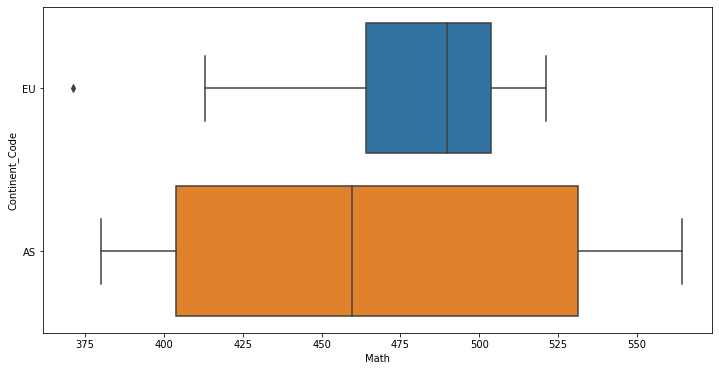

In [106]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Math", y="Continent_Code",data=df2);

In [118]:
asia=df2[(pisa["Continent_Code"]=="AS")]["Math"]
europa=df2[(pisa["Continent_Code"]=="EU")]["Math"]

In [122]:
indTest = stats.ttest_ind(europa, asia)
indTest

Ttest_indResult(statistic=0.870055317967983, pvalue=0.38826888111307345)

EXERCISE 4. The sample dataset has placement test scores (out of 100 points) for four subject areas: English, Reading, Math, and Writing. Students in the sample completed all 4 placement tests when they enrolled in the university. Suppose we are particularly interested in the English and Math sections, and want to determine whether students tended to score higher on their English or Math test, on average. We could use a paired t test to test if there was a significant difference in the average of the two tests.

In [107]:
sample=pd.read_csv("sample.csv")
sample

,ids,bday,enrolldate,expgradate,Rank,Major,Gender,Athlete,Height,Weight,Smoking,Sprint,MileMinDur,English,Reading,Math,Writing,State,LiveOnCampus,HowCommute,CommuteTime,SleepTime,StudyTime
0,43783,3/22/1995,NaN,NaN,NaN,NaN,0.0,0,72.35,NaN,0.0,7.978,NaN,88.24,81.50,60.02,81.44,In state,1.0,NaN,NaN,7.0,1.0
1,20278,1/1/1995,NaN,NaN,NaN,Philosophy,0.0,0,70.66,179.20,0.0,8.004,0:06:21,89.45,85.25,70.19,73.27,NaN,1.0,NaN,NaN,5.0,2.0
2,20389,12/31/1994,NaN,NaN,NaN,NaN,0.0,0,70.68,198.52,0.0,NaN,0:07:00,96.73,86.88,71.20,84.24,In state,NaN,NaN,NaN,8.0,7.0
3,22820,12/1/1994,NaN,NaN,NaN,business administration,1.0,0,NaN,198.34,NaN,8.473,0:12:44,74.06,88.68,55.89,73.16,In state,1.0,NaN,NaN,2.0,6.0
4,24559,11/10/1994,NaN,NaN,NaN,NaN,1.0,1,67.43,128.17,2.0,NaN,0:06:25,82.61,77.30,65.52,80.45,Out of state,1.0,NaN,NaN,7.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,34021,7/18/1987,1-Aug-2011,08-May-2017,4.0,accounting,1.0,0,NaN,NaN,0.0,NaN,0:12:55,87.72,84.99,65.31,NaN,In state,0.0,1.0,18.0,1.0,10.0
431,40697,4/29/1987,1-Aug-2011,09-May-2016,4.0,NaN,0.0,0,68.50,131.92,0.0,9.125,0:08:33,91.01,86.87,70.25,82.67,In state,0.0,3.0,26.0,6.0,15.0
432,34272,NaN,1-Aug-2011,09-May-2016,4.0,nursing,0.0,1,68.10,130.07,0.0,NaN,NaN,81.05,85.76,58.16,81.87,NaN,0.0,3.0,29.0,6.0,10.0
433,33628,NaN,1-Aug-2011,08-May-2017,4.0,Nursing,1.0,1,69.27,157.26,2.0,6.905,0:08:26,75.59,85.97,66.84,79.35,In state,0.0,1.0,14.0,4.0,10.0


In [113]:
df3=sample[["English", "Math"]]
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   English  409 non-null    float64
 1   Math     422 non-null    float64
dtypes: float64(2)
memory usage: 6.9 KB


In [124]:
pairedtest = stats.ttest_rel(df3.English, df3.Math, alternative='two-sided', nan_policy="omit")
pairedtest

Ttest_relResult(statistic=36.31256898171986, pvalue=3.071098719220689e-128)